# <center>Battle at the Bars</center>

##### <center>by Kristopher Knight</center>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">The Data</a>

3. <a href="#item3">Methodology and Code</a>

4. <a href="#item4">Results</a>

5. <a href="#item5">Discussion</a> 
    
6. <a href="#item6">Conclusion</a> 
</font>
</div>

<a id='item1'></a>
## 1.  Introduction

In the city of New Orleans there are hundreds of places to eat, dance, listen to music, and enjoy the wonderful cultural arts this city has to offer. Nothing in the world is quite like it and nothing compares to the wild night life you can experience in the bars of this city. There is a plethora of diversity and unique bars in this city, not just bourbon street. Unfortunately, New Orleans is also home to some very unsavory characters and a lagniappe of crime. In this report I hope to use data science to find the best and safest bars New Orleans has to offer and where to go.

<a id='item2'></a>
## 2.  The Data

I plan to use the Foursquare API to locate the venues and join that with the 2019 “Calls for service” database as provided by Orleans Parish Communication District (OPCD), the administrative office of 9-1-1 for the City of New Orleans. The data contained in Foursquare API should provide the name, location, and their ratings. The OPCD call data contains the location of incidents and the types of incidents.


<a id='item3'></a>
## 3.  Methodology and Code

Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
%matplotlib inline

So I dont accidentally push this notebook containing my API credentials to git, I decided to use a csv to obfuscate the credentials in a file I will not push.

In [2]:
creds = pd.read_csv('CSV_CONTAINING_CREDENTIALS.csv')

In [3]:
CLIENT_ID = creds[creds['API']=="FOURSQUARE"].CID[0]
CLIENT_SECRET = creds[creds['API']=="FOURSQUARE"].CS[0]
VERSION = creds[creds['API']=="FOURSQUARE"].VER[0]
LIMIT = 50
NOLA_LAT = 29.9511
NOLA_LONG = -90.0715

In [4]:
CATEGORY = '4bf58dd8d48988d116941735'
near = 'New Orleans, LA'

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, CATEGORY,LIMIT)

In [6]:
results = requests.get(url).json()

In [7]:
results

{'meta': {'code': 200, 'requestId': '5e343e0b71c428001b318331'},
 'response': {'venues': [{'id': '4af4aeccf964a5200bf521e3',
    'name': 'Sazerac Bar',
    'location': {'address': '130 Roosevelt Way',
     'crossStreet': 'at Common St',
     'lat': 29.954173,
     'lng': -90.071977,
     'labeledLatLngs': [{'label': 'display',
       'lat': 29.954173,
       'lng': -90.071977}],
     'postalCode': '70112',
     'cc': 'US',
     'city': 'New Orleans',
     'state': 'LA',
     'country': 'United States',
     'formattedAddress': ['130 Roosevelt Way (at Common St)',
      'New Orleans, LA 70112',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d11e941735',
      'name': 'Cocktail Bar',
      'pluralName': 'Cocktail Bars',
      'shortName': 'Cocktail',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '54505136'},
    'referralId': 'v-1580482194',
    'hasPerk

In [8]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,4af4aeccf964a5200bf521e3,Sazerac Bar,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",v-1580482194,False,130 Roosevelt Way,at Common St,29.954173,-90.071977,"[{'label': 'display', 'lat': 29.954173, 'lng':...",...,United States,"[130 Roosevelt Way (at Common St), New Orleans...",54505136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41326e00f964a52041181fe3,Avenue Pub,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",v-1580482194,False,1732 Saint Charles Ave,at Polymnia St,29.936937,-90.076848,"[{'label': 'display', 'lat': 29.93693652128023...",...,United States,"[1732 Saint Charles Ave (at Polymnia St), New ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5cdcaf5373fe25002c332c28,Bar MariLou,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",v-1580482194,False,544 Carondelet St,NaN,29.948760,-90.071763,"[{'label': 'display', 'lat': 29.94876, 'lng': ...",...,United States,"[544 Carondelet St, New Orleans, LA 70130, Uni...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c847d6527cbd100258228e5,Jewel Of The South,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",v-1580482194,False,1026 Saint Louis St,NaN,29.958538,-90.069523,"[{'label': 'display', 'lat': 29.958538, 'lng':...",...,United States,"[1026 Saint Louis St, New Orleans, LA 70112, U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58b5b660084be52b647021ad,Effervescence bubbles & bites,"[{'id': '4bf58dd8d48988d1d4941735', 'name': 'S...",v-1580482194,False,1036 N Rampart St.,NaN,29.963530,-90.065514,"[{'label': 'display', 'lat': 29.96353006551273...",...,United States,"[1036 N Rampart St., New Orleans, LA 70116, Un...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataframe.shape

(50, 24)

Well crud.... the near and category parameter seems to only return 30 results, but we're trying to pull every bar in New Orleans. So, to get arround this limitation, I found the lat long for every neighborhood in New Orleans on wiki and scraped it.

At 72 calls for the neighborhood search and probably well over 100 bars to calls I may only beable to run this once or twice a day.

In [10]:
nola_hoods = pd.read_html('https://en.wikipedia.org/wiki/Neighborhoods_in_New_Orleans')[0]

In [11]:
nola_hoods.head()

,Neighborhood,Longitude,Latitude
0,U.S. NAVAL BASE,-90.026093,29.946085
1,ALGIERS POINT,-90.051606,29.952462
2,WHITNEY,-90.042357,29.947200
3,AUDUBON,-90.121450,29.932994
4,OLD AURORA,-90.000000,29.924440


In [12]:
nola_hoods.shape

(72, 3)

In [339]:
map_nola = folium.Map(location=[NOLA_LAT, NOLA_LONG], zoom_start=12)

for lat, lng, neighborhood in zip(nola_hoods['Latitude'], nola_hoods['Longitude'], nola_hoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nola)  
    
map_nola

New Orleans is also really oddly shaped so finding a radius that doesnt overlap too much was also a challange. 

So to counteract this we see from the above image there are a few outliers that could have the radius modified to fit better. Or use the next nearest neighbor of each point to define the radius in meters, add this to the dataframe and use that for each row.

In [40]:
def getNearbyBars(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print('Checking... '&name&' @ '&radius)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            CATEGORY,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['name',
                  'id',  
                  'Latitude', 
                  'Longitude', 
                  'Category']
    
    return(nearby_venues)

In [42]:
radius_arr = [500,750,1000,2000,4000]

nola_bars = pd.DataFrame()

for i in radius_arr:
    nola_bars_get = getNearbyBars(names=nola_hoods['Neighborhood'],
                              latitudes=nola_hoods['Latitude'],
                              longitudes=nola_hoods['Longitude'],
                              radius=i                
                                  )
    nola_bars = pd.concat([nola_bars, nola_bars_get])


nola_bars.to_csv("nola_bars_pull.csv")

In [46]:
nola_bars.head()

,name,id,Latitude,Longitude,Category
0,Old Point Bar,41326e00f964a520e1191fe3,29.954940,-90.050226,Bar
1,The Crown & Anchor,4ad4c04cf964a52025f320e3,29.951416,-90.054220,Bar
2,The Dry Dock Cafe & Bar,4aef18fbf964a52099d521e3,29.952053,-90.054769,Bar
3,One Stone Restaurant,59b6b844898bdc4e5f32e2c4,29.952617,-90.051255,Coffee Shop
4,Pal's Lounge,4af54ec2f964a520c7f821e3,29.976796,-90.086339,Bar


In [48]:
nola_bars = nola_bars.sort_values('name', ascending=False)
nola_bars = nola_bars.drop_duplicates(subset='name', keep='first')
nola_bars.shape

(576, 5)

In [340]:
map_nola = folium.Map(location=[NOLA_LAT, NOLA_LONG], zoom_start=13)

for lat, lng, neighborhood in zip(nola_bars['Latitude'], nola_bars['Longitude'], nola_bars['name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nola)  
    
map_nola

In [60]:
nola_bars.to_csv("NOLA Bars Filtered.csv")

In [81]:
opcd_calls = pd.read_csv('Calls_for_Service_2019.csv')

In [82]:
opcd_calls.tail()

,NOPD_Item,Type,TypeText,Priority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrival,TimeClosed,...,DispositionText,InitialType,InitialTypeText,InitialPriority,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
460028,L1690619,103M,MENTAL PATIENT,2C,37369000,3513814,12/12/2019 9:28,12/12/2019 9:29,12/12/2019 9:32,12/12/2019 10:27,...,Necessary Action Taken,103M,MENTAL PATIENT,2C,N,6F05,Washington Ave & Freret St,70115,6,"0.0, 0.0"
460029,L1645919,94,DISCHARGING FIREARM,2D,3715625,555730,12/12/2019 1:16,12/12/2019 1:24,12/12/2019 1:34,12/12/2019 1:52,...,GONE ON ARRIVAL,94,DISCHARGING FIREARM,2D,N,7J03,045XX Papania Dr,70127,7,"30.0209855, -89.95939818"
460030,L1768219,22A,AREA CHECK,1K,3668318,550807,12/12/2019 21:01,12/12/2019 21:01,12/12/2019 21:01,12/12/2019 21:32,...,Necessary Action Taken,22A,AREA CHECK,1K,Y,3F01,065XX Louis Xiv St,70124,3,"30.00892366, -90.1090418"
460031,L1735819,TS,TRAFFIC STOP,1J,3694468,559884,12/12/2019 15:36,12/12/2019 15:36,12/12/2019 15:36,12/12/2019 16:03,...,Necessary Action Taken,TS,TRAFFIC STOP,1J,Y,7D02,Hayne Blvd & Alabama St,70126,7,"30.03308724, -90.02609927"
460032,L1700519,21,COMPLAINT OTHER,1J,3673037,534303,12/12/2019 10:46,12/12/2019 10:46,12/12/2019 10:46,12/12/2019 11:06,...,Necessary Action Taken,21,COMPLAINT OTHER,1J,N,1K01,030XX Tulane Ave,70119,1,"29.96340436, -90.09469548"


In [179]:
calls_filtered = opcd_calls[['TypeText','Location']]
calls_filtered[['Latitude','Longitude']] = calls_filtered.Location.str.split(",",expand=True,)
calls_filtered = calls_filtered[calls_filtered.Location != '0.0, 0.0']
calls_filtered=calls_filtered.dropna(subset=['Longitude'])
calls_filtered=calls_filtered.dropna(subset=['Latitude'])
calls_filtered=calls_filtered.dropna(subset=['TypeText'])
calls_filtered.drop(calls_filtered[ calls_filtered['Location'] == '0.0, 0.0'].index , inplace=True)
calls_filtered.drop(['Location'], axis=1, inplace=True)
calls_filtered[["Latitude", "Longitude"]] = calls_filtered[["Latitude", "Longitude"]].apply(pd.to_numeric)
calls_filtered.head()

,TypeText,Latitude,Longitude
0,AREA CHECK,30.005922,-90.121489
1,HIT & RUN,30.046052,-89.961172
2,DOMESTIC DISTURBANCE,29.969724,-90.068045
3,COMPLAINT OTHER,30.029206,-89.984120
4,HIT & RUN,29.965481,-90.071825


In [180]:
calls_filtered.shape

(439811, 3)

In [181]:
calls_filtered['TypeText'].unique()

array(['AREA CHECK', 'HIT & RUN', 'DOMESTIC DISTURBANCE',
       'COMPLAINT OTHER', 'RECOVERY OF REPORTED STOLEN VEHICLE',
       'DISTURBANCE OTHER', 'SIMPLE BURGLARY VEHICLE', 'DRUG VIOLATIONS',
       'AGGRAVATED ASSAULT', 'SUSPICIOUS PERSON',
       'SIMPLE CRIMINAL DAMAGE', 'EXTORTION THREATS DOMESTIC',
       'AUTO ACCIDENT', 'RETURN FOR ADDITIONAL INFO', 'BICYCLE THEFT',
       'SIMPLE ASSAULT', 'EXTORTION THREATS', 'SIMPLE BATTERY',
       'AUTO THEFT', 'DRIVING WHILE UNDER INFLUENCE',
       'OBSCENITY, EXPOSING', 'SIMPLE BATTERY DOMESTIC',
       'WARR STOP WITH RELEASE', 'FUGITIVE ATTACHMENT',
       'BURGLAR ALARM, SILENT', 'MUNICIPAL ATTACHMENT', 'NOISE COMPLAINT',
       'BUSINESS CHECK', 'DISCHARGING FIREARM', 'TRAFFIC INCIDENT',
       'AGGRAVATED ASSAULT DOMESTIC', 'LOST PROPERTY',
       'SIMULTANEOS STOLEN/RECOVERY VEHICLE',
       'TOW IMPOUNDED VEHICLE PRIVATE', 'WALKING BEAT', 'FIRE',
       'VIOLATION OF PROTECTION ORDER', 'RECKLESS DRIVING',
       'CRIMINAL DAM

In [182]:
DroppedCalls = ['AREA CHECK','AUTO ACCIDENT','RECKLESS DRIVING','TRAFFIC STOP','RETURN FOR ADDITIONAL INFO','RECOVERY OF REPORTED STOLEN VEHICLE','WARR STOP WITH RELEASE','FUGITIVE ATTACHMENT','COMPLAINT OTHER','HIT & RUN','SUSPICIOUS PERSON','BURGLAR ALARM, SILENT','MUNICIPAL ATTACHMENT','BUSINESS CHECK','TRAFFIC INCIDENT','LOST PROPERTY','TOW IMPOUNDED VEHICLE PRIVATE','WALKING BEAT','RECKLESS','DRIVING','AUTO ACCIDENT WITH INJURY','AUTO ACCIDENT POLICE VEHICLE','DIRECTED PATROL','HIT & RUN WITH','INJURIES','VEHICLE PURSUIT','RECOVERY OF VEHICLE','DIRECTED TRAFFIC ENFORCEMENT','TRAFFIC ATTACHMENT','QUALITY OF','LIFE ISSUE','HOMELESS','INCIDENT REQUESTED BY ANOTHER AGENCY','MISSING ADULT','UNCLASSIFIED DEATH','DEATH','AUTO','ACCIDENT CITY VEHICLE','ABANDONED VEHICLE','CONTRIBUTING TO DELINQUENCY','TRUANT VIOLATION','RESIDENCE CHECK','DRUNK','POSSESSION OF STOLEN PROPERTY','VIDEO VOYEURISM','CURFEW VIOLATION','ATTACHMENT','VEHICLE NO-PURSUIT','FIREWORKS','FLOOD EVENT','UNDERPASS MONITORING OR CLOSURE','AUTO ACCIDENT FATALITY','TRAFFIC CONGESTION','DISPERSE SUBJECTS','ISSUING WORTHLESS CHECKS','HIT & RUN CITY VEHICLE','SEX OFFENDER REGISTRATION CHECK','TRAFFIC','STOP','TROOP N AREA - BUSINESS - RESIDENCE CHECK','NEGLIENT INJURY','OFFICER NEEDS ASSISTANCE, LIFE IN DANGER','ABANDONED BOAT','CAD TEST','PROTEST','PARADE ITEM NUMBER','MEET AN OFFICER','BLIGHTED PROPERTY','OFFICER NEEDS','ASSISTANCE','ASSET SEIZURE','HIT & RUN FATALITY','FLOODED VEHICLE','AIRPLANE CRASH']

for dropme in DroppedCalls:
    calls_filtered.drop(calls_filtered[ calls_filtered['TypeText'] == dropme].index , inplace=True)

In [183]:
calls_filtered.shape

(114761, 3)

In [184]:
calls_filtered["City"]='New Orleans'

In [185]:
calls_filtered.head()

,TypeText,Latitude,Longitude,City
2,DOMESTIC DISTURBANCE,29.969724,-90.068045,New Orleans
7,DISTURBANCE OTHER,30.027642,-89.991504,New Orleans
9,SIMPLE BURGLARY VEHICLE,30.010675,-90.003663,New Orleans
10,DRUG VIOLATIONS,30.020656,-90.020070,New Orleans
11,AGGRAVATED ASSAULT,29.977147,-90.047054,New Orleans


In [186]:
calls_filtered.groupby('City').count()

,TypeText,Latitude,Longitude
City,,,
New Orleans,114761,114761,114761


In [187]:
calls_onehot = pd.get_dummies(calls_filtered[['TypeText']], prefix="", prefix_sep="")
calls_onehot['City'] = calls_filtered['City'] 
fixed_columns = [calls_onehot.columns[-1]] + list(calls_onehot.columns[:-1])
calls_onehot = calls_onehot[fixed_columns]

calls_onehot.head()

,City,AGGRAVATED ARSON,AGGRAVATED ASSAULT,AGGRAVATED ASSAULT DOMESTIC,AGGRAVATED BATTERY,AGGRAVATED BATTERY BY CUTTING,AGGRAVATED BATTERY BY SHOOTING,AGGRAVATED BATTERY DOMESTIC,AGGRAVATED BURGLARY,AGGRAVATED BURGLARY DOMESTIC,...,SIMULTANEOS STOLEN/RECOVERY VEHICLE,SUSPICIOUS PACKAGE,THEFT,THEFT BY EMBEZZLEMENT,THEFT BY FRAUD,THEFT FROM EXTERIOR OF VEHICLE,UNAUTHORIZED USE OF VEHICLE,UNDERAGE DRINKING VIOLATION,UNLAWFUL SALES TO MINORS,VIOLATION OF PROTECTION ORDER
2,New Orleans,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,New Orleans,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,New Orleans,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,New Orleans,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,New Orleans,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
calls_grouped = calls_onehot.groupby('City').mean().reset_index()
calls_grouped

,City,AGGRAVATED ARSON,AGGRAVATED ASSAULT,AGGRAVATED ASSAULT DOMESTIC,AGGRAVATED BATTERY,AGGRAVATED BATTERY BY CUTTING,AGGRAVATED BATTERY BY SHOOTING,AGGRAVATED BATTERY DOMESTIC,AGGRAVATED BURGLARY,AGGRAVATED BURGLARY DOMESTIC,...,SIMULTANEOS STOLEN/RECOVERY VEHICLE,SUSPICIOUS PACKAGE,THEFT,THEFT BY EMBEZZLEMENT,THEFT BY FRAUD,THEFT FROM EXTERIOR OF VEHICLE,UNAUTHORIZED USE OF VEHICLE,UNDERAGE DRINKING VIOLATION,UNLAWFUL SALES TO MINORS,VIOLATION OF PROTECTION ORDER
0,New Orleans,0.00007,0.008679,0.002109,0.001168,0.002518,0.003729,0.000993,0.000514,0.000235,...,0.001969,0.000253,0.051899,0.000671,0.019963,0.00711,0.005054,0.00027,0.000009,0.003782


In [189]:
num_top_calls = 10

for hood in calls_grouped['City']:
    print("----"+hood+"----")
    temp = calls_grouped[calls_grouped['City'] == hood].T.reset_index()
    temp.columns = ['call','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----New Orleans----
                      call  freq
0        DISTURBANCE OTHER  0.24
1     DOMESTIC DISTURBANCE  0.09
2  SIMPLE BURGLARY VEHICLE  0.07
3                    THEFT  0.05
4   SIMPLE CRIMINAL DAMAGE  0.04
5              SHOPLIFTING  0.04
6           SIMPLE BATTERY  0.04
7  SIMPLE BATTERY DOMESTIC  0.04
8               AUTO THEFT  0.03
9          DRUG VIOLATIONS  0.03




In [190]:
def return_most_common_calls(row, num_top_calls):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_calls]

In [191]:
num_top_calls = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Call'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Call'.format(ind+1))

# create a new dataframe
calls_sorted = pd.DataFrame(columns=columns)
calls_sorted['City'] = calls_grouped['City']

for ind in np.arange(calls_grouped.shape[0]):
    calls_sorted.iloc[ind, 1:] = return_most_common_calls(calls_grouped.iloc[ind, :], num_top_calls)

calls_sorted.head()

,City,1st Most Common Call,2nd Most Common Call,3rd Most Common Call,4th Most Common Call,5th Most Common Call,6th Most Common Call,7th Most Common Call,8th Most Common Call,9th Most Common Call,10th Most Common Call
0,New Orleans,DISTURBANCE OTHER,DOMESTIC DISTURBANCE,SIMPLE BURGLARY VEHICLE,THEFT,SHOPLIFTING,SIMPLE BATTERY DOMESTIC,SIMPLE BATTERY,SIMPLE CRIMINAL DAMAGE,AUTO THEFT,FIGHT


The Join! the idea is to join the table with the lat longs to have many rows for each bar and nearby call events... to match more events we will adjust the lat longs by rounding up and filling nan bars with a common key to identify them as safe\

In [192]:
calls_filtered.head()

,TypeText,Latitude,Longitude,City
2,DOMESTIC DISTURBANCE,29.969724,-90.068045,New Orleans
7,DISTURBANCE OTHER,30.027642,-89.991504,New Orleans
9,SIMPLE BURGLARY VEHICLE,30.010675,-90.003663,New Orleans
10,DRUG VIOLATIONS,30.020656,-90.020070,New Orleans
11,AGGRAVATED ASSAULT,29.977147,-90.047054,New Orleans


In [212]:
nola_bars.shape

(576, 5)

In [239]:
decimal_precision = pd.read_html('https://en.wikipedia.org/wiki/Decimal_degrees')[1]
decimal_precision

,decimalplaces,decimaldegrees,DMS,Object that can be unambiguously recognized at this scale,N/S or E/W at equator,E/W at23N/S,E/W at45N/S,E/W at67N/S
0,0,1.000000e+00,1° 00′ 0″,country or large region,111.32 km,102.47 km,78.71 km,43.496 km
1,1,1.000000e-01,0° 06′ 0″,large city or district,11.132 km,10.247 km,7.871 km,4.3496 km
2,2,1.000000e-02,0° 00′ 36″,town or village,1.1132 km,1.0247 km,787.1 m,434.96 m
3,3,1.000000e-03,0° 00′ 3.6″,"neighborhood, street",111.32 m,102.47 m,78.71 m,43.496 m
4,4,1.000000e-04,0° 00′ 0.36″,"individual street, land parcel",11.132 m,10.247 m,7.871 m,4.3496 m
5,5,1.000000e-05,0° 00′ 0.036″,"individual trees, door entrance",1.1132 m,1.0247 m,787.1 mm,434.96 mm
6,6,1.000000e-06,0° 00′ 0.0036″,individual humans,111.32 mm,102.47 mm,78.71 mm,43.496 mm
7,7,1.000000e-07,0° 00′ 0.00036″,practical limit of commercial surveying,11.132 mm,10.247 mm,7.871 mm,4.3496 mm
8,8,1.000000e-08,0° 00′ 0.000036″,specialized surveying (e.g. tectonic plate map...,1.1132 mm,1.0247 mm,787.1 μm,434.96 μm


In [216]:
nola_bars_round = nola_bars.round({'Latitude': 4, 'Longitude': 4})
calls_filtered_round = calls_filtered.round({'Latitude': 4, 'Longitude': 4})

In [217]:
nola_bars_round.head()

,name,id,Latitude,Longitude,Category
106,prohibition,538acb1b498ef911b5276790,29.9561,-90.0679,Bar
1688,d.b.a.,4ada6d8cf964a520822221e3,29.9640,-90.0579,Jazz Club
225,bar redux,52b5ff2e498ea0f99ae321c3,29.9617,-90.0324,Caribbean Restaurant
803,Zydeco's Cajun Restaurant,4bf85dff4a67c928f94d25cf,29.8779,-90.0173,Seafood Restaurant
294,Ye Olde College Inn,4ad4c050f964a5208df420e3,29.9605,-90.1160,Southern / Soul Food Restaurant


In [218]:
calls_filtered_round.head()

,TypeText,Latitude,Longitude,City
2,DOMESTIC DISTURBANCE,29.9697,-90.0680,New Orleans
7,DISTURBANCE OTHER,30.0276,-89.9915,New Orleans
9,SIMPLE BURGLARY VEHICLE,30.0107,-90.0037,New Orleans
10,DRUG VIOLATIONS,30.0207,-90.0201,New Orleans
11,AGGRAVATED ASSAULT,29.9771,-90.0471,New Orleans


In [227]:
merged_bar_calls = pd.merge(nola_bars_round, calls_filtered_round, how='left', on=['Latitude', 'Longitude'])

In [228]:
merged_bar_calls.shape

(1658, 7)

In [229]:
merged_bar_calls.head()

,name,id,Latitude,Longitude,Category,TypeText,City
0,prohibition,538acb1b498ef911b5276790,29.9561,-90.0679,Bar,NaN,NaN
1,d.b.a.,4ada6d8cf964a520822221e3,29.9640,-90.0579,Jazz Club,DISTURBANCE OTHER,New Orleans
2,d.b.a.,4ada6d8cf964a520822221e3,29.9640,-90.0579,Jazz Club,BICYCLE THEFT,New Orleans
3,d.b.a.,4ada6d8cf964a520822221e3,29.9640,-90.0579,Jazz Club,AUTO THEFT,New Orleans
4,bar redux,52b5ff2e498ea0f99ae321c3,29.9617,-90.0324,Caribbean Restaurant,NaN,NaN


In [230]:
merged_bar_calls.groupby('name').count()

,id,Latitude,Longitude,Category,TypeText,City
name,,,,,,
13 Bar & Restaurant,4,4,4,4,4,4
21st Amendment,1,1,1,1,0,0
45 Tchoup,1,1,1,1,0,0
8 Block Kitchen & Bar at Hyatt Regency NOLA,1,1,1,1,0,0
ALLways Lounge,1,1,1,1,0,0
...,...,...,...,...,...,...
Ye Olde College Inn,1,1,1,1,0,0
Zydeco's Cajun Restaurant,1,1,1,1,0,0
bar redux,1,1,1,1,0,0


In [231]:
bar_calls_onehot = pd.get_dummies(merged_bar_calls[['TypeText']], prefix="", prefix_sep="")
bar_calls_onehot['name'] = merged_bar_calls['name'] 
fixed_columns = [bar_calls_onehot.columns[-1]] + list(bar_calls_onehot.columns[:-1])
bar_calls_onehot = bar_calls_onehot[fixed_columns]

bar_calls_onehot.head()

,name,AGGRAVATED ASSAULT,AGGRAVATED BATTERY,AGGRAVATED BATTERY BY CUTTING,ARMED ROBBERY WITH GUN,ARMED ROBBERY WITH KNIFE,AUTO ACCIDENT CITY VEHICLE,AUTO THEFT,BICYCLE THEFT,BOMB SCARE,...,SIMPLE BURGLARY VEHICLE,SIMPLE CRIMINAL DAMAGE,SIMPLE ROBBERY,"SIMPLE ROBBERY, PROPERTY SNATCHING",SIMULTANEOS STOLEN/RECOVERY VEHICLE,THEFT,THEFT BY FRAUD,THEFT FROM EXTERIOR OF VEHICLE,UNAUTHORIZED USE OF VEHICLE,VIOLATION OF PROTECTION ORDER
0,prohibition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,d.b.a.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,d.b.a.,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,d.b.a.,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bar redux,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
bar_calls_grouped = bar_calls_onehot.groupby('name').mean().reset_index()

In [234]:
bar_calls_grouped.head()

,name,AGGRAVATED ASSAULT,AGGRAVATED BATTERY,AGGRAVATED BATTERY BY CUTTING,ARMED ROBBERY WITH GUN,ARMED ROBBERY WITH KNIFE,AUTO ACCIDENT CITY VEHICLE,AUTO THEFT,BICYCLE THEFT,BOMB SCARE,...,SIMPLE BURGLARY VEHICLE,SIMPLE CRIMINAL DAMAGE,SIMPLE ROBBERY,"SIMPLE ROBBERY, PROPERTY SNATCHING",SIMULTANEOS STOLEN/RECOVERY VEHICLE,THEFT,THEFT BY FRAUD,THEFT FROM EXTERIOR OF VEHICLE,UNAUTHORIZED USE OF VEHICLE,VIOLATION OF PROTECTION ORDER
0,13 Bar & Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
1,21st Amendment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,45 Tchoup,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,8 Block Kitchen & Bar at Hyatt Regency NOLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,ALLways Lounge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [261]:
num_top_bar_calls = 10

for bar in bar_calls_grouped['name']:
    print("----"+bar+"----")
    temp = bar_calls_grouped[bar_calls_grouped['name'] == bar].T.reset_index()
    temp.columns = ['call','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_bar_calls))
    print('\n')

----13 Bar & Restaurant----
                                call  freq
0                     SIMPLE BATTERY  0.50
1                     THEFT BY FRAUD  0.25
2                         PICKPOCKET  0.25
3                 AGGRAVATED ASSAULT  0.00
4  ILLEGAL CARRYING OF WEAPON- KNIFE  0.00
5           IMPERSONATING AN OFFICER  0.00
6                    NOISE COMPLAINT  0.00
7                OBSCENITY, EXPOSING  0.00
8                            PROWLER  0.00
9              QUALITY OF LIFE ISSUE  0.00


----21st Amendment----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0



9               SHOPLIFTING   0.0


----Beachbum Berry's Latitude 29----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Beachcorner Bar & Grill----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE IS

                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Casamento's----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Cat Planet----
           

9                        SHOPLIFTING   0.0


----DISTRICT. Donuts. Sliders. Brew.----
                       call  freq
0         DISTURBANCE OTHER   1.0
1        AGGRAVATED ASSAULT   0.0
2            SIMPLE BATTERY   0.0
3  IMPERSONATING AN OFFICER   0.0
4           NOISE COMPLAINT   0.0
5       OBSCENITY, EXPOSING   0.0
6                PICKPOCKET   0.0
7                   PROWLER   0.0
8     QUALITY OF LIFE ISSUE   0.0
9               SHOPLIFTING   0.0


----Daiquiri Bay Cafe----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Daiquiri Chef----
               

                       call  freq
0            SIMPLE BATTERY   0.5
1         DISTURBANCE OTHER   0.5
2        AGGRAVATED ASSAULT   0.0
3  IMPERSONATING AN OFFICER   0.0
4           NOISE COMPLAINT   0.0
5       OBSCENITY, EXPOSING   0.0
6                PICKPOCKET   0.0
7                   PROWLER   0.0
8     QUALITY OF LIFE ISSUE   0.0
9               SHOPLIFTING   0.0


----Fat Tuesday's Daquiri Shack----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Feelings Cafe----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1    

9                        SHOPLIFTING   0.0


----HiVolt Coffee----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Hilton----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9            

9                        SHOPLIFTING   0.0


----Junction----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Kajun's Pub----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9            

9                        SHOPLIFTING   0.0


----Marigny Brasserie----
                            call  freq
0  AGGRAVATED BATTERY BY CUTTING   1.0
1             AGGRAVATED ASSAULT   0.0
2        SIMPLE BATTERY DOMESTIC   0.0
3       IMPERSONATING AN OFFICER   0.0
4                NOISE COMPLAINT   0.0
5            OBSCENITY, EXPOSING   0.0
6                     PICKPOCKET   0.0
7                        PROWLER   0.0
8          QUALITY OF LIFE ISSUE   0.0
9                    SHOPLIFTING   0.0


----Markey's Bar----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


--

9                        SHOPLIFTING   0.0


----Oceana Grill----
                              call  freq
0                DISTURBANCE OTHER  0.28
1                  DRUG VIOLATIONS  0.26
2                            THEFT  0.12
3  ILLEGAL CARRYING OF WEAPON- GUN  0.09
4                       PICKPOCKET  0.07
5                            FIGHT  0.06
6                   THEFT BY FRAUD  0.05
7                   SIMPLE BATTERY  0.02
8          SIMPLE BATTERY DOMESTIC  0.01
9                    HOLD UP ALARM  0.01


----Okay Bar----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTI

9                        SHOPLIFTING   0.0


----Prytania Liquor Store----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Public Belt----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0


9                        SHOPLIFTING   0.0


----Second Vine----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----Shahrazad’s Cafe----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9    

9                        SHOPLIFTING   0.0


----The Annex----
                                call  freq
0                    NOISE COMPLAINT   1.0
1                 AGGRAVATED ASSAULT   0.0
2                     SIMPLE BATTERY   0.0
3  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
4           IMPERSONATING AN OFFICER   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----The Bachelors III----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9     

                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----The Old Absinthe House----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----The Orange Couc

9                        SHOPLIFTING   0.0


----VooDoo BBQ & Grill Uptown----
                                call  freq
0                 AGGRAVATED ASSAULT   0.0
1                     SIMPLE BATTERY   0.0
2  ILLEGAL CARRYING OF WEAPON- KNIFE   0.0
3           IMPERSONATING AN OFFICER   0.0
4                    NOISE COMPLAINT   0.0
5                OBSCENITY, EXPOSING   0.0
6                         PICKPOCKET   0.0
7                            PROWLER   0.0
8              QUALITY OF LIFE ISSUE   0.0
9                        SHOPLIFTING   0.0


----VooDoo Lounge----
                       call  freq
0         DISTURBANCE OTHER   0.4
1                     THEFT   0.2
2           SILENT 911 CALL   0.2
3            THEFT BY FRAUD   0.1
4                     FIGHT   0.1
5        AGGRAVATED ASSAULT   0.0
6            SIMPLE ASSAULT   0.0
7  IMPERSONATING AN OFFICER   0.0
8           NOISE COMPLAINT   0.0
9       OBSCENITY, EXPOSING   0.0


----Voodoo Bar----
                             

In [341]:
def return_most_common_calls(row, num_top_calls):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_calls]

In [342]:
num_top_calls = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Call'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Call'.format(ind+1))

# create a new dataframe
calls_sorted = pd.DataFrame(columns=columns)
calls_sorted['name'] = bar_calls_grouped['name']

for ind in np.arange(bar_calls_grouped.shape[0]):
    calls_sorted.iloc[ind, 1:] = return_most_common_calls(bar_calls_grouped.iloc[ind, :], num_top_calls)

calls_sorted.head()

,name,1st Most Common Call,2nd Most Common Call,3rd Most Common Call,4th Most Common Call,5th Most Common Call,6th Most Common Call,7th Most Common Call,8th Most Common Call,9th Most Common Call,10th Most Common Call
0,13 Bar & Restaurant,SIMPLE BATTERY,THEFT BY FRAUD,PICKPOCKET,VIOLATION OF PROTECTION ORDER,BUSINESS BURGLARY,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER
1,21st Amendment,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM
2,45 Tchoup,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM
3,8 Block Kitchen & Bar at Hyatt Regency NOLA,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM
4,ALLways Lounge,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM


In [263]:
dups = merged_bar_calls.pivot_table(index=['name'], aggfunc='size')
dups.head()

name
13 Bar & Restaurant                            4
21st Amendment                                 1
45 Tchoup                                      1
8 Block Kitchen & Bar at Hyatt Regency NOLA    1
ALLways Lounge                                 1
dtype: int64

In [343]:
dups = merged_bar_calls.groupby(merged_bar_calls.name.tolist()).size().reset_index().rename(columns={0:'count'})
dups.rename(columns={"index": "name", "count": "# of Calls"}, inplace=True)
dups.sort_values(by='# of Calls', ascending=False).head(10).style.hide_index()

name,# of Calls
Oceana Grill,144
Famous Door,88
Sheraton New Orleans Hotel,84
Midtown Hotel,47
The Beach on Bourbon,37
Bourbon Pub & Parade,33
Cat's Meow,28
Burgundy Bar at The Saint Hotel,26
Monkey Board,25
Krazy Korner,24


In [345]:
merged_bar_calls_totals = pd.merge(calls_sorted, dups, how='left', on=['name'])

In [346]:
merged_bar_calls_totals.sort_values(by='# of Calls', ascending=False).head(10).style.hide_index()

name,1st Most Common Call,2nd Most Common Call,3rd Most Common Call,4th Most Common Call,5th Most Common Call,6th Most Common Call,7th Most Common Call,8th Most Common Call,9th Most Common Call,10th Most Common Call,# of Calls
Oceana Grill,DISTURBANCE OTHER,DRUG VIOLATIONS,THEFT,ILLEGAL CARRYING OF WEAPON- GUN,PICKPOCKET,FIGHT,THEFT BY FRAUD,SIMPLE BATTERY,DOMESTIC DISTURBANCE,HOLD UP ALARM,144
Famous Door,DISTURBANCE OTHER,FIGHT,THEFT,DRUG VIOLATIONS,ILLEGAL CARRYING OF WEAPON- GUN,PICKPOCKET,SIMPLE BATTERY,THEFT BY FRAUD,SIMPLE BATTERY DOMESTIC,AGGRAVATED ASSAULT,88
Sheraton New Orleans Hotel,THEFT,DISTURBANCE OTHER,THEFT BY FRAUD,SIMPLE BATTERY,SIMPLE BATTERY DOMESTIC,DOMESTIC DISTURBANCE,PROWLER,FIGHT,PICKPOCKET,SILENT 911 CALL,84
Midtown Hotel,DISTURBANCE OTHER,THEFT,SIMPLE BATTERY,THEFT BY FRAUD,FIGHT,DOMESTIC DISTURBANCE,AUTO THEFT,"OBSCENITY, EXPOSING",SIMPLE BATTERY DOMESTIC,SIMPLE BURGLARY VEHICLE,47
The Beach on Bourbon,DISTURBANCE OTHER,THEFT,THEFT BY FRAUD,SIMPLE BATTERY,PICKPOCKET,SIMPLE BATTERY DOMESTIC,AGGRAVATED ASSAULT,FIRE,ILLEGAL CARRYING OF WEAPON- GUN,NOISE COMPLAINT,37
Bourbon Pub & Parade,DISTURBANCE OTHER,SIMPLE BATTERY,FIGHT,PICKPOCKET,NOISE COMPLAINT,DRUG VIOLATIONS,DOMESTIC DISTURBANCE,THEFT,"SIMPLE ROBBERY, PROPERTY SNATCHING",SIMPLE ROBBERY,33
Cat's Meow,DISTURBANCE OTHER,SIMPLE BATTERY,THEFT,PICKPOCKET,FIGHT,THEFT BY FRAUD,BUSINESS BURGLARY,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,28
Burgundy Bar at The Saint Hotel,DISTURBANCE OTHER,THEFT,DOMESTIC DISTURBANCE,SILENT 911 CALL,SIMPLE BATTERY,DRUG VIOLATIONS,UNAUTHORIZED USE OF VEHICLE,"OBSCENITY, EXPOSING",BUSINESS BURGLARY,FIGHT,26
Monkey Board,DISTURBANCE OTHER,THEFT,FIGHT,DOMESTIC DISTURBANCE,SIMULTANEOS STOLEN/RECOVERY VEHICLE,AUTO THEFT,SIMPLE BATTERY,BUSINESS BURGLARY,EXTORTION THREATS,DRUG VIOLATIONS,25
Krazy Korner,PICKPOCKET,THEFT,THEFT BY FRAUD,DISTURBANCE OTHER,SIMPLE BATTERY,SIMPLE ROBBERY,FIGHT,VIOLATION OF PROTECTION ORDER,BUSINESS BURGLARY,DRUG VIOLATIONS,24


Now I have a list of the most calls to a bar location which is possibly an indicator of an unsafe bar. Let's find the bar with the most likes! this is going to be 576 calls to the API, hopefully just under the daily limit depending on how much coding I've done that day.

In [316]:
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/538acb1b498ef911b5276790/likes?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION
    )

results = requests.get(url).json()["response"]

results

{'likes': {'count': 10,
  'summary': '10 Likes',
  'items': [{'id': '33973',
    'firstName': 'Arjun',
    'lastName': 'S',
    'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
     'suffix': '/33973_oJwyftxL_FaJdnbQI3pK_0xx4wbEHBsg1HiQUWisraGPgqLhLlLlfSfVY58WIHbGpxNouSMme'}},
   {'id': '20988762',
    'firstName': 'Trisha',
    'lastName': 'C',
    'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
     'suffix': '/UB4EPY1LEMH211AK.jpg'}},
   {'id': '68709926',
    'firstName': 'Sam',
    'lastName': 'C',
    'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
     'suffix': '/68709926-ZSPKQFHFICTRAK3Y'}}]}}

In [328]:
def getBarLikes(names,ids):
        
    venues_list=[]
    for name, VENUE_ID in zip(names,ids ):
        
        #print('Checking... ' + name + ' @ ' + VENUE_ID)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
            VENUE_ID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION
        )
            
        # make the GET request
        results = requests.get(url).json()["response"]['likes']['count']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            results)])

    bars = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    bars.columns = ['name',
                  'likes']
    
    return(venues_list)

In [329]:
nola_bars_get_likes = getBarLikes(names=nola_bars['name'],
                                  ids=nola_bars['id']
                                  )

In [332]:
nola_bars_get_likes = pd.DataFrame([item for nola_bars_get_likes in nola_bars_get_likes for item in nola_bars_get_likes])

In [334]:
nola_bars_get_likes.columns = ['name',
                  'likes']

In [336]:
nola_bars_get_likes.head()

,name,likes
0,prohibition,10
1,d.b.a.,517
2,bar redux,33
3,Zydeco's Cajun Restaurant,31
4,Ye Olde College Inn,29


In [337]:
nola_bars_get_likes.to_csv('nola_bar_likes.csv')

In [338]:
nola_bars_get_likes.sort_values(by='likes', ascending=False).head(10).style.hide_index()

name,likes
Pat O'Brien's,1601
Mercedes-Benz Superdome,1435
House of Blues Restaurant & Bar,1403
Lafitte's Blacksmith Shop,1260
Acme Oyster House,1167
The Carousel Bar & Lounge,991
The Spotted Cat Music Club,844
Commander's Palace,801
The Ruby Slipper,767
Bacchanal Wine,722


In [347]:
merged_bar_calls_totals_likes = pd.merge(merged_bar_calls_totals, nola_bars_get_likes, how='left', on=['name'])

In [348]:
merged_bar_calls_totals_likes.sort_values(by='likes', ascending=False).head(10).style.hide_index()

name,1st Most Common Call,2nd Most Common Call,3rd Most Common Call,4th Most Common Call,5th Most Common Call,6th Most Common Call,7th Most Common Call,8th Most Common Call,9th Most Common Call,10th Most Common Call,# of Calls,likes
Pat O'Brien's,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,1601
Mercedes-Benz Superdome,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,1435
House of Blues Restaurant & Bar,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,1403
Lafitte's Blacksmith Shop,THEFT BY FRAUD,DISTURBANCE OTHER,SIMPLE BURGLARY VEHICLE,FIGHT,THEFT,SIMPLE BATTERY,PICKPOCKET,VIOLATION OF PROTECTION ORDER,BUSINESS BURGLARY,DRUG VIOLATIONS,23,1260
Acme Oyster House,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,1167
The Carousel Bar & Lounge,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,991
The Spotted Cat Music Club,DISTURBANCE OTHER,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISCHARGING FIREARM,1,844
Commander's Palace,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,801
The Ruby Slipper,DISTURBANCE OTHER,THEFT BY FRAUD,NOISE COMPLAINT,PICKPOCKET,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,8,767
Bacchanal Wine,VIOLATION OF PROTECTION ORDER,CARJACKING- NO WEAPON,FIRE,FIGHT,EXTORTION THREATS,DRUG VIOLATIONS,DRIVING WHILE UNDER INFLUENCE,DOMESTIC DISTURBANCE,DISTURBANCE OTHER,DISCHARGING FIREARM,1,722


In [350]:
calls_vs_likes = merged_bar_calls_totals_likes[['name','# of Calls', 'likes']]

In [352]:
calls_vs_likes.rename(columns={"# of Calls": "calls"}, inplace=True)

c:\users\knigh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


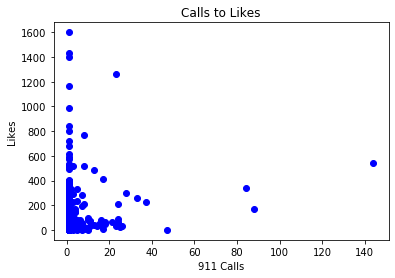

In [359]:
import matplotlib.pyplot as plt
plt.title('Calls to Likes')
plt.xlabel('911 Calls')
plt.ylabel('Likes')
x = calls_vs_likes[['calls']]
y = calls_vs_likes[['likes']]
plt.scatter(x, y, c = 'blue')
plt.show()

In [360]:
import seaborn as sns

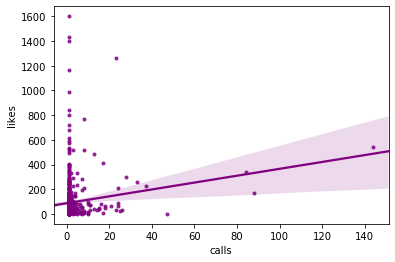

In [365]:
sns.regplot(x="calls", y="likes", data=calls_vs_likes, color='purple', marker='.', order=1)

In [368]:
pearsoncorr = calls_vs_likes.corr(method='pearson')

In [370]:
pearsoncorr.head()

,calls,likes
calls,1.000000,0.140911
likes,0.140911,1.000000


<a id='item4'></a>
## 4.  Results